In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="C:\\Landsat8"

In [3]:
band4=gdal.Open(path+r"\LC08_L1TP_145045_20191014_20191018_01_T1_B4.tif")
col,row=band4.RasterXSize,band4.RasterYSize
print(" number of rows - "+str(row)+"\n","number of columns - "+str(col))

 number of rows - 7691
 number of columns - 7531


In [4]:
b4=band4.GetRasterBand(1)
red_band=b4.ReadAsArray().astype("float32")
red_band

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

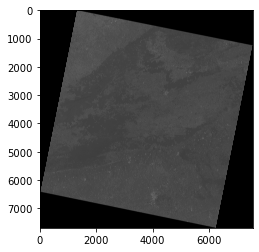

In [5]:
# view image
plt.imshow(red_band,cmap="gray")

In [6]:
#similarly open NIR band
band5=gdal.Open(path+r"\LC08_L1TP_145045_20191014_20191018_01_T1_B5.tif")
NIR=band5.GetRasterBand(1).ReadAsArray().astype('float32')

In [7]:
print(' band 4 statstics')
print("max=",np.max(red_band),"  minimum=",np.min(red_band),"  mean=",np.mean(red_band))
print('\n band 5 statstics')
print("max=",np.max(NIR),"  minimum=",np.min(NIR),"  mean=",np.mean(NIR))

 band 4 statstics
max= 27497.0   minimum= 0.0   mean= 5634.33

 band 5 statstics
max= 32486.0   minimum= 0.0   mean= 11934.474


before NDVI calculation replace backgroung pixel value (i.e.=0) with nan

In [8]:
red_band[red_band==0.0]=np.nan
NIR[NIR==0.0]=np.nan

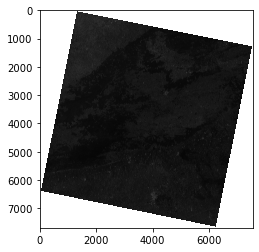

In [9]:
plt.imshow(red_band,cmap="gray")

# NDVI calculation

In [10]:
NDVI=(NIR-red_band)/(NIR+red_band)

# saving NDVI as .tif file

In [11]:
#get projection and image footprints
geo=band4.GetGeoTransform()
proj=band4.GetProjection()
shape=np.shape(red_band)
print(geo)
print(proj)

(665985.0, 30.0, 0.0, 2513715.0, 0.0, -30.0)
PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32643"]]


In [12]:
#assign projection and geotransformation to NDVI image
driver=gdal.GetDriverByName("GTiff")
ds=driver.Create("E:\\NDVI.tif",shape[1],shape[0], 1,gdal.GDT_Float32)
ds.SetProjection(proj)
ds.SetGeoTransform(geo)
ds.GetRasterBand(1).WriteArray(NDVI)
ds=None

# OPEN NDVI IMAGE

In [13]:
data=gdal.Open(r"E:\\NDVI.tif")
NDVI=data.GetRasterBand(1).ReadAsArray()

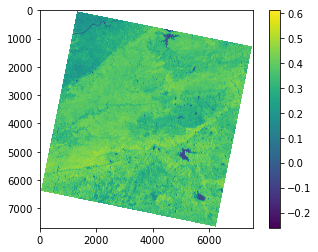

In [14]:
plt.imshow(NDVI)
plt.colorbar()